#### Carregando a base de dados

In [2]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_census.pkl', mode = 'rb') as arquivo:
    x_previsores, y_classes, x_teste, y_teste = pickle.load( arquivo )

In [3]:
x_previsores.shape, y_classes.shape

((27676, 108), (27676,))

In [4]:
x_teste.shape, y_teste.shape

((4885, 108), (4885,))

#### Aplicação do aprendizado

In [5]:
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(
    hidden_layer_sizes = (55,55),  # Camadas ocultas - 108 entrada + 2 saída = 110. 110/2 = 55 neuronios para camadas ocultas
    activation = 'relu',  # Função de ativação
    max_iter = 2000,  # Quantidade de épocas
    tol=0.00001,  # Tolerância a mudança de erro
    verbose=True
)

# Ajuste e previsão
modelo.fit(x_previsores, y_classes)

Iteration 1, loss = 0.38228183
Iteration 2, loss = 0.32574093
Iteration 3, loss = 0.31448964
Iteration 4, loss = 0.30659593
Iteration 5, loss = 0.30239239
Iteration 6, loss = 0.29848092
Iteration 7, loss = 0.29491929
Iteration 8, loss = 0.29244207
Iteration 9, loss = 0.28950103
Iteration 10, loss = 0.28749045
Iteration 11, loss = 0.28572923
Iteration 12, loss = 0.28341449
Iteration 13, loss = 0.28281478
Iteration 14, loss = 0.28033773
Iteration 15, loss = 0.27877569
Iteration 16, loss = 0.27688898
Iteration 17, loss = 0.27526052
Iteration 18, loss = 0.27411463
Iteration 19, loss = 0.27213331
Iteration 20, loss = 0.27029082
Iteration 21, loss = 0.26810294
Iteration 22, loss = 0.26618716
Iteration 23, loss = 0.26714121
Iteration 24, loss = 0.26440563
Iteration 25, loss = 0.26199492
Iteration 26, loss = 0.26050540
Iteration 27, loss = 0.25884585
Iteration 28, loss = 0.25747883
Iteration 29, loss = 0.25692892
Iteration 30, loss = 0.25498669
Iteration 31, loss = 0.25370387
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=2000, tol=1e-05,
              verbose=True)

In [6]:
previsao = modelo.predict(x_teste)

In [7]:
from sklearn.metrics import accuracy_score

print(f'Precisão do modelo: {accuracy_score( y_teste, previsao)*100:.2f}%')

Precisão do modelo: 80.63%


#### Visualizando resultados do modelo

In [8]:
from yellowbrick.classifier import ConfusionMatrix
from matplotlib.pyplot import xlabel, ylabel
from sklearn.metrics import classification_report

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "<=50K>", 3.220 previsões estão corretas e 473 estão incorretas.**

<br>

**Para a classe ">50K", 719 previsões estão corretas e 473 estão incorretas.**

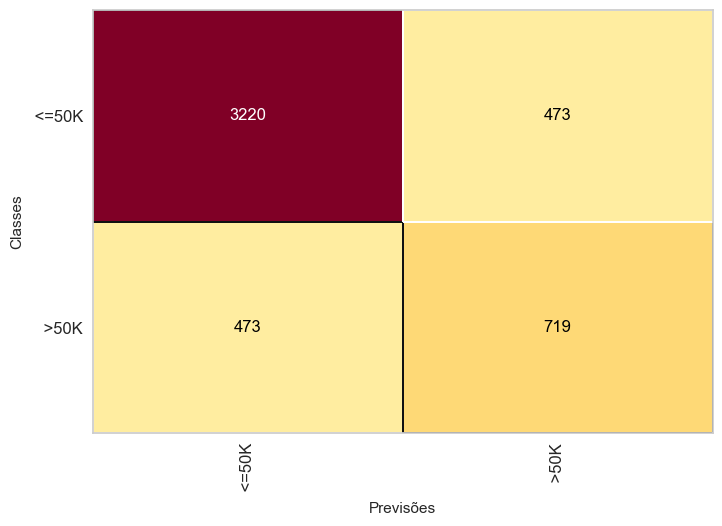

In [9]:
cm = ConfusionMatrix( modelo )
cm.fit( x_previsores, y_classes )
cm.score( x_teste, y_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [10]:
print(classification_report( y_teste, previsao ))

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      3693
        >50K       0.60      0.60      0.60      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

